In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# Digital Footprints 1 & 2

- Data Wrangling

In [101]:
df_1 = pd.read_csv ("/Users/admin/Downloads/project/PROJECT-5/df_final_web_data_pt_1.csv")
df_1 

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [102]:
df_2 = pd.read_csv ("/Users/admin/Downloads/project/PROJECT-5/df_final_web_data_pt_2.csv")
df_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [103]:
df_digitalfootprints = pd.concat([df_1, df_2], axis=0)
df_digitalfootprints

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [104]:
for x in df_digitalfootprints.columns: # Check percentage of empty cells per column
    print(f"The percentage of empty cells in column {x} is {round(df_digitalfootprints[x].isna().sum()/len(df_digitalfootprints[x])*100,2)} %.")

The percentage of empty cells in column client_id is 0.0 %.
The percentage of empty cells in column visitor_id is 0.0 %.
The percentage of empty cells in column visit_id is 0.0 %.
The percentage of empty cells in column process_step is 0.0 %.
The percentage of empty cells in column date_time is 0.0 %.


In [105]:
df_digitalfootprints.dropna()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [106]:
df_digitalfootprints.drop_duplicates()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [107]:
df_digitalfootprints.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [108]:
df_digitalfootprints.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [109]:
df_digitalfootprints.shape

(755405, 5)

In [110]:
df_digitalfootprints.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [111]:
df_digitalfootprints.select_dtypes("number").nunique().sort_values(ascending=False)

client_id    120157
dtype: int64

In [112]:
df_digitalfootprints.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [113]:
df_digitalfootprints['client_id'].value_counts()

client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
          ... 
656715       1
2066750      1
1283050      1
6963245      1
674799       1
Name: count, Length: 120157, dtype: int64

In [114]:
df_digitalfootprints["visitor_id"].value_counts()

visitor_id
722943003_3441581446     104
857376424_12378092455     90
272742682_16716805486     81
78799102_14329268381      80
780189529_68744403580     80
                        ... 
126345313_81637097552      1
344922862_88034013382      1
920532103_65264751870      1
451773986_45029239446      1
947159805_81558194550      1
Name: count, Length: 130236, dtype: int64

In [115]:
df_digitalfootprints["process_step"].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

# Experiment Roster

- Data Wrangling

In [116]:
df_experiment= pd.read_csv("/Users/admin/Downloads/project/PROJECT-5/df_final_experiment_clients.csv")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [117]:
for x in df_experiment.columns:
    print(f"The percentage of empty cells in column {x} is {round(df_experiment[x].isna().sum()/len(df_experiment[x])*100,2)} %.")

The percentage of empty cells in column client_id is 0.0 %.
The percentage of empty cells in column Variation is 28.48 %.


In [118]:
df_experiment.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
5,9466803,Test
6,3170143,Test
7,6651403,Control
8,5887227,Test
9,2105948,Control


In [119]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [120]:
df_experiment.shape

(70609, 2)

In [121]:
df_experiment.dtypes

client_id     int64
Variation    object
dtype: object

In [122]:
df_experiment.select_dtypes("number").columns

Index(['client_id'], dtype='object')

In [123]:
df_experiment.select_dtypes("number").nunique().sort_values(ascending=False)

client_id    70609
dtype: int64

In [124]:
df_experiment['client_id'].value_counts()

client_id
9988021    1
4555516    1
4998932    1
3385751    1
4339267    1
          ..
7675264    1
5574016    1
573200     1
9466333    1
9895983    1
Name: count, Length: 70609, dtype: int64

In [125]:
df_experiment['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [126]:
df_experiment = df_experiment.dropna(how='all')
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [127]:
df_experiment.drop_duplicates

<bound method DataFrame.drop_duplicates of        client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]>

In [128]:
df_experiment = df_experiment.dropna(subset=['Variation'])
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [129]:
df_experiment.head(15)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
5,9466803,Test
6,3170143,Test
7,6651403,Control
8,5887227,Test
9,2105948,Control


# Client Profiles 

- Data Wrangling

In [130]:
df_demographic = pd.read_csv("/Users/admin/Downloads/project/PROJECT-5/df_final_demo.csv")
df_demographic

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [131]:
df_demographic.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [132]:
df_demographic.describe() 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [133]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [134]:
df_demographic.shape

(70609, 9)

In [135]:
df_demographic.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [136]:
df_demographic.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [137]:
df_demographic.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [138]:
for x in df_demographic.columns:
    print(f"The percentage of empty cells in column {x} is {round(df_demographic[x].isna().sum()/len(df_demographic[x])*100,2)} %.")

The percentage of empty cells in column client_id is 0.0 %.
The percentage of empty cells in column clnt_tenure_yr is 0.02 %.
The percentage of empty cells in column clnt_tenure_mnth is 0.02 %.
The percentage of empty cells in column clnt_age is 0.02 %.
The percentage of empty cells in column gendr is 0.02 %.
The percentage of empty cells in column num_accts is 0.02 %.
The percentage of empty cells in column bal is 0.02 %.
The percentage of empty cells in column calls_6_mnth is 0.02 %.
The percentage of empty cells in column logons_6_mnth is 0.02 %.


In [139]:
df_demographic.drop_duplicates

<bound method DataFrame.drop_duplicates of        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F

In [140]:
df_demographic.dropna()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [141]:
df_demographic["clnt_age"]

0        60.5
1        58.0
2        32.0
3        49.0
4        33.0
         ... 
70604    38.5
70605    31.0
70606    61.5
70607    68.0
70608    59.5
Name: clnt_age, Length: 70609, dtype: float64

In [142]:
df_demographic['clnt_age'].value_counts()

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

In [143]:
df_client_age = df_demographic[['clnt_age']]
df_client_age

,clnt_age
0,60.5
1,58.0
2,32.0
3,49.0
4,33.0
...,...
70604,38.5
70605,31.0
70606,61.5
70607,68.0


In [144]:
df_client_age = df_client_age.copy()

In [145]:
df_client_age.loc[:, 'clnt_age'] = df_client_age['clnt_age'].fillna(0)

In [146]:
df_client_age.loc[:, 'clnt_age'] = df_client_age['clnt_age'].astype(int)

In [147]:
df_client_age.loc[:, 'clnt_age'] = df_client_age['clnt_age'].replace(0, np.nan)

In [148]:
df_client_age

,clnt_age
0,60.0
1,58.0
2,32.0
3,49.0
4,33.0
...,...
70604,38.0
70605,31.0
70606,61.0
70607,68.0


In [149]:
df_client_age.shape

(70609, 1)

In [150]:
df_client_age.dropna()

,clnt_age
0,60.0
1,58.0
2,32.0
3,49.0
4,33.0
...,...
70604,38.0
70605,31.0
70606,61.0
70607,68.0


In [151]:
df_client_age.drop_duplicates

<bound method DataFrame.drop_duplicates of        clnt_age
0          60.0
1          58.0
2          32.0
3          49.0
4          33.0
...         ...
70604      38.0
70605      31.0
70606      61.0
70607      68.0
70608      59.0

[70609 rows x 1 columns]>

In [152]:
df_demographic['clnt_tenure_yr'].value_counts()

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

In [153]:
df_tenure_year = df_demographic[['clnt_tenure_yr']]
df_tenure_year

,clnt_tenure_yr
0,6.0
1,7.0
2,5.0
3,16.0
4,12.0
...,...
70604,4.0
70605,12.0
70606,16.0
70607,21.0


In [154]:
df_tenure_year.dropna()

,clnt_tenure_yr
0,6.0
1,7.0
2,5.0
3,16.0
4,12.0
...,...
70604,4.0
70605,12.0
70606,16.0
70607,21.0


In [155]:
df_tenure_year.drop_duplicates

<bound method DataFrame.drop_duplicates of        clnt_tenure_yr
0                 6.0
1                 7.0
2                 5.0
3                16.0
4                12.0
...               ...
70604             4.0
70605            12.0
70606            16.0
70607            21.0
70608            21.0

[70609 rows x 1 columns]>

In [156]:
df_demographic['clnt_tenure_yr'].min(),df_demographic['clnt_tenure_yr'].max(), df_demographic['clnt_tenure_yr'].mean()

(2.0, 62.0, 12.052949925632127)

# EDA: Client Behavior Analysis

- Who are the primary clients using this online process? Are the primary clients younger or older, new or long-standing?

In [157]:
# define bins and labels for age categories, create age category
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, df_demographic['clnt_age'].max()]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-max']
df_demographic['Age_category'] = pd.cut(df_demographic['clnt_age'], bins=bins, labels=labels, include_lowest=True)
df_demographic['Age_category']

0        60-70
1        50-60
2        30-40
3        40-50
4        30-40
         ...  
70604    30-40
70605    30-40
70606    60-70
70607    60-70
70608    50-60
Name: Age_category, Length: 70609, dtype: category
Categories (9, object): ['10-20' < '20-30' < '30-40' < '40-50' ... '60-70' < '70-80' < '80-90' < '90-max']

In [158]:
df_demographic['Age_category'].value_counts().sort_values(ascending=False)

Age_category
50-60     15549
30-40     12930
40-50     12590
20-30     12545
60-70     11571
70-80      3319
10-20      1479
80-90       570
90-max       41
Name: count, dtype: int64

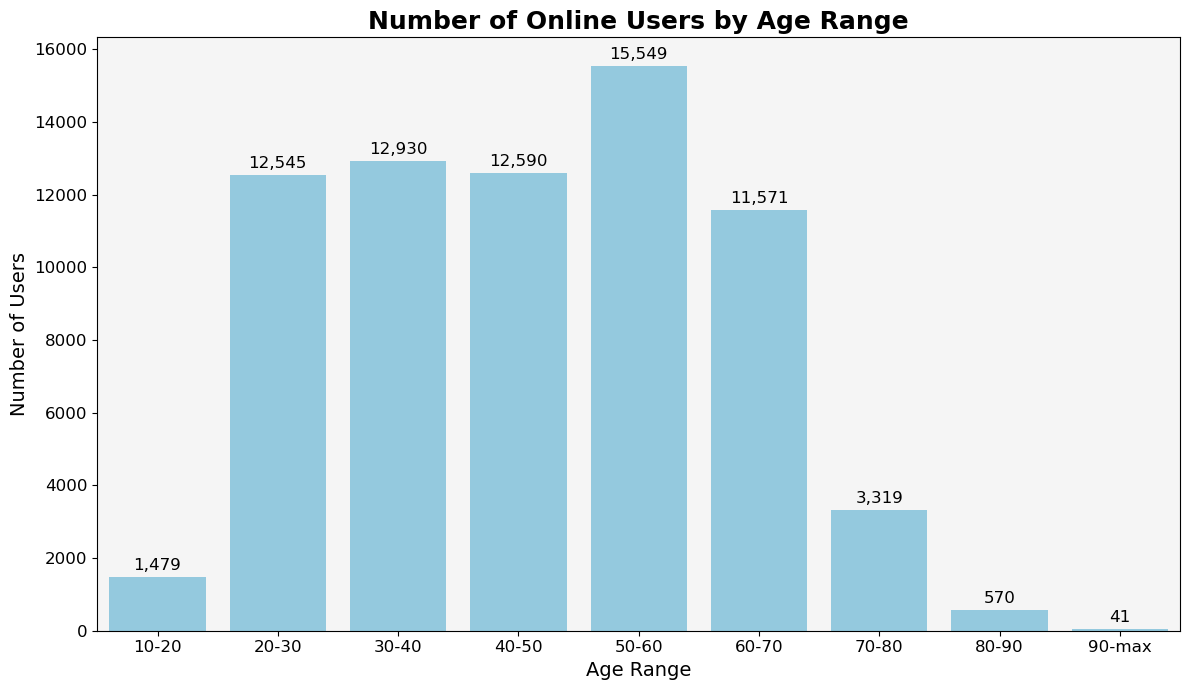

In [159]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x=df_demographic['Age_category'], color='skyblue')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','),  # Convert to integer for display
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Online Users by Age Range', fontsize=18, weight='bold')
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
#plt.savefig('age_distribution.png', format='png', dpi=300)
plt.show()

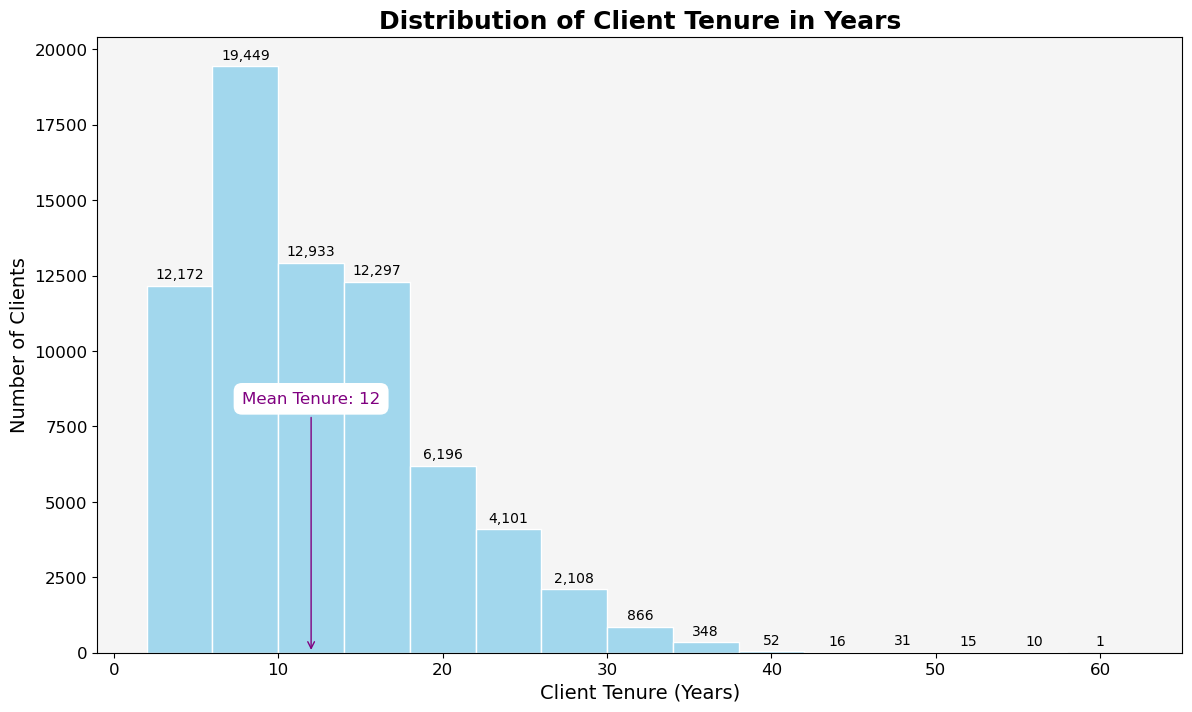

In [160]:
plt.figure(figsize=(14, 8))
ax = sns.histplot(df_tenure_year['clnt_tenure_yr'], bins=15, color='skyblue', edgecolor='white')

plt.title('Distribution of Client Tenure in Years', fontsize=18, weight='bold')
plt.xlabel('Client Tenure (Years)', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)

# Calculate mean tenure
mean_tenure = int(df_tenure_year['clnt_tenure_yr'].mean())

# Annotating mean position with a short marker
ax.annotate(f'Mean Tenure: {mean_tenure}',
            xy=(mean_tenure, 0), xytext=(mean_tenure, max(plt.ylim()) * 0.4),
            arrowprops=dict(facecolor='purple', edgecolor='purple', arrowstyle='->'),
            ha='center', va='bottom', fontsize=12, color='purple',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.gca().set_facecolor('whitesmoke')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('client_tenure_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Key Performance Metrics

- Success Indicator: Completion Rate (The proportion of users who reach the final ‘confirm’ step)

In [161]:
df_completion_rate = pd.merge(df_experiment, df_digitalfootprints, on='client_id', how='inner')
df_completion_rate

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [162]:
df_confirm = df_completion_rate[df_completion_rate['process_step'] == 'confirm']
df_confirm

,client_id,Variation,visitor_id,visit_id,process_step,date_time
15,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
35,1982004,Test,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
...,...,...,...,...,...,...
321232,8692087,Test,87619541_16268405483,654226272_50322046833_890618,confirm,2017-03-29 17:28:07
321250,5305116,Control,87196875_82592805389,69164930_20082199445_40666,confirm,2017-04-20 09:30:11
321255,393005,Control,238199953_33257685972,579367767_60788307935_908431,confirm,2017-03-29 15:46:16
321295,5230357,Test,832474317_11880812098,28245330_61880751416_631586,confirm,2017-04-19 11:24:46


# Test Group Users

In [163]:
df_test = df_completion_rate[df_completion_rate['Variation'] == 'Test']
df_test

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [164]:
confirm_test = df_test[df_test['process_step'] == 'confirm']
confirm_test

,client_id,Variation,visitor_id,visit_id,process_step,date_time
15,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
35,1982004,Test,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
48,3170143,Test,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04 18:41:44
73,5887227,Test,448202785_26003228044,458489157_53226123692_778999,confirm,2017-04-05 14:52:34
99,438567,Test,694624747_14580652583,787486191_38787201768_120150,confirm,2017-06-08 16:46:39
...,...,...,...,...,...,...
321219,5969816,Test,470587199_31947711941,312260787_57270254471_839042,confirm,2017-04-06 10:10:49
321231,8692087,Test,87619541_16268405483,654226272_50322046833_890618,confirm,2017-03-29 17:29:18
321232,8692087,Test,87619541_16268405483,654226272_50322046833_890618,confirm,2017-03-29 17:28:07
321295,5230357,Test,832474317_11880812098,28245330_61880751416_631586,confirm,2017-04-19 11:24:46


# Total Confirm Test

In [165]:
total_confirm_test = confirm_test['visit_id'].nunique()
total_confirm_test

21731

In [166]:
#total_confirm_test_df = pd.DataFrame({'Metric': ['Total Confirm Test'], 'Value': [total_confirm_test]})
#total_confirm_test_df.to_csv('total_confirm_test.csv', index=False)

# Total Test Visits

In [167]:
total_test_visits = df_test['visit_id'].nunique()
total_test_visits

37136

# Completion Rate Test Group Users

In [168]:
completion_rate_test = total_confirm_test / total_test_visits
completion_rate_test

0.5851734166307626

In [169]:
print(f"Completion Rate Test: {completion_rate_test:.2%}") 

Completion Rate Test: 58.52%


In [170]:
# Tableau Visualization 
test_group_metrics = {
    'Metric': ['Total Confirmed Tests', 'Total Test Visits', 'Completion Rate'],
    'Value': [total_confirm_test, total_test_visits, completion_rate_test]
}

In [171]:
df_test_metrics = pd.DataFrame(test_group_metrics)
print(df_test_metrics)

                  Metric         Value
0  Total Confirmed Tests  21731.000000
1      Total Test Visits  37136.000000
2        Completion Rate      0.585173


In [172]:
#df_test_metrics.to_csv('completion_test_metrics.csv', index=False)

# Control Group Users

In [173]:
df_control = df_completion_rate[df_completion_rate['Variation'] == 'Control']
df_control 

,client_id,Variation,visitor_id,visit_id,process_step,date_time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...,...
321265,393005,Control,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29 15:25:20
321266,2908510,Control,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
321267,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
321268,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [174]:
confirm_control = df_control[df_control['process_step'] == 'confirm']
confirm_control

,client_id,Variation,visitor_id,visit_id,process_step,date_time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
56,6651403,Control,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04 17:38:39
81,2105948,Control,111894218_79248359000,284161492_75966778593_698992,confirm,2017-04-05 14:04:56
...,...,...,...,...,...,...
321177,9939260,Control,544119272_17209144682,760019269_15187312508_670785,confirm,2017-04-05 17:55:34
321195,9376975,Control,320922127_54812543194,838186030_74835070084_762390,confirm,2017-04-12 11:30:56
321228,4364429,Control,891701696_99389403404,383900719_38482997479_782885,confirm,2017-04-13 18:22:05
321250,5305116,Control,87196875_82592805389,69164930_20082199445_40666,confirm,2017-04-20 09:30:11


# Total Control Confirm

In [175]:
total_confirm_control = confirm_control['visit_id'].nunique()
total_confirm_control 

16046

# Total Control Visits

In [176]:
total_control_visits = df_control['visit_id'].nunique()
total_control_visits

32189

# Completion Rate Control Group Users

In [177]:
completion_rate_control = total_confirm_control / total_control_visits
completion_rate_control

0.4984932740998478

In [178]:
print(f" Completion Rate Control: {completion_rate_control:.2%}")

 Completion Rate Control: 49.85%


In [179]:
# Tableau Visualization 
control_group_metrics = {
    'Metric': ['Total Confirmed Control', 'Total Control Visits', 'Completion Rate'],
    'Value': [total_confirm_control, total_control_visits, completion_rate_control]
}

In [180]:
df_control_metrics = pd.DataFrame(control_group_metrics)
print(df_control_metrics)

                    Metric         Value
0  Total Confirmed Control  16046.000000
1     Total Control Visits  32189.000000
2          Completion Rate      0.498493


In [181]:
#df_control_metrics.to_csv('completion_control_metrics.csv', index=False)

# Data Frame for Tableau Visualizations

In [182]:
df_test_metrics['Group'] = 'Test'
df_control_metrics['Group'] = 'Control'

In [183]:
df_combined_metrics = pd.concat([df_test_metrics, df_control_metrics], ignore_index=True)
df_combined_metrics

,Metric,Value,Group
0,Total Confirmed Tests,21731.000000,Test
1,Total Test Visits,37136.000000,Test
2,Completion Rate,0.585173,Test
3,Total Confirmed Control,16046.000000,Control
4,Total Control Visits,32189.000000,Control
5,Completion Rate,0.498493,Control


In [184]:
#df_combined_metrics.to_csv('combined_metrics.csv', index=False) 

# Hypothesis Testing

- Hypothesis Test related to the completion rate between the Test and Control Groups. Since the new design (Test Group) had higher completion rate compared to the old design (Control Group). The following analysis is to confirm if the diference is statistically significant.

In [185]:
count = np.array([total_confirm_test, total_confirm_control]) 
nobs = np.array([total_test_visits, total_control_visits])  

# Calculate the difference in proportions
test_proportion = total_confirm_test/ total_test_visits
control_proportion = total_confirm_control / total_control_visits
difference = test_proportion - control_proportion

# Perform Z-test for proportions, comparing the test group with the control group 
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

alpha = 0.05 
if p_value > alpha:
    print("Fail to reject H0. No sufficient evidence to conlude Control Group has higher completion rate.")
else:
    print("Reject H0. Sufficient evidence to conclude Test Group has higher Completion rate.")

Z-statistic: 22.85684118615931
P-value: 6.247505366322125e-116
Reject H0. Sufficient evidence to conclude Test Group has higher Completion rate.


In [186]:
count = np.array([total_confirm_test, total_confirm_control]) 
nobs = np.array([total_test_visits, total_control_visits])  

# Calculate the difference in proportions
test_proportion = total_confirm_test/ total_test_visits
control_proportion = total_confirm_control / total_control_visits
difference = test_proportion - control_proportion

# Define the threshold for the difference (5% or 0.05)
threshold = 0.05

# Perform Z-test for proportions, comparing the test group with the control group + 5% threshold
z_stat, p_value = proportions_ztest(count, nobs, value=threshold, alternative='larger')


print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value > alpha:
    print("Fail to reject Ho. Completion Rate Control is higher than Completion Rate Test.")
else:
    print("Reject Ho. Completion rate Test is higher than Completion Rate Control and meets or exceeds the 5% threshold.")

Z-statistic: 9.672252121825847
P-value: 1.9778773473162174e-22
Reject Ho. Completion rate Test is higher than Completion Rate Control and meets or exceeds the 5% threshold.


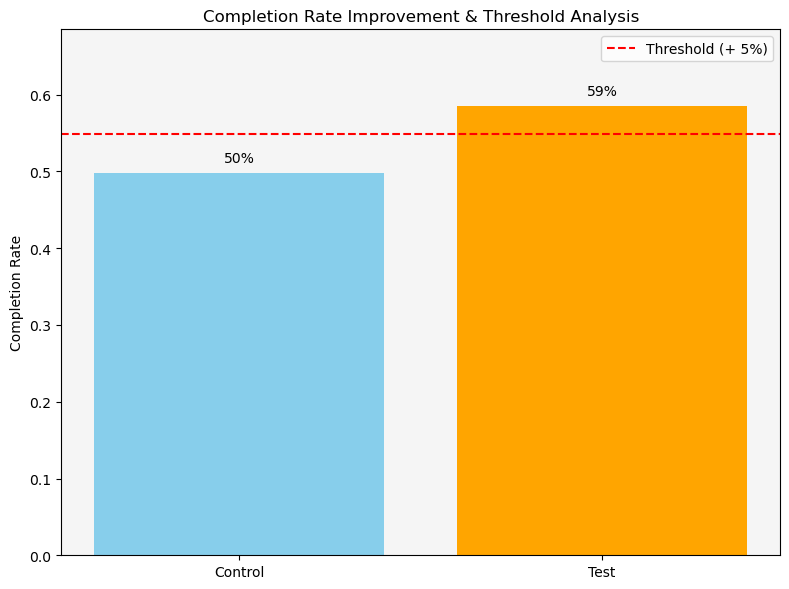

In [187]:
total_confirm_test = 21731
total_test_visits = 37136
total_confirm_control = 16046
total_control_visits = 32189

test_proportion = total_confirm_test / total_test_visits
control_proportion = total_confirm_control / total_control_visits
threshold = 0.05

# Expected uplift threshold = control proportion + 5%
expected_uplift = control_proportion + threshold

groups = ['Control', 'Test']
proportions = [control_proportion, test_proportion]

plt.figure(figsize=(8, 6))
bars = plt.bar(groups, proportions, color=['skyblue', 'orange'])

# Add threshold line
plt.axhline(expected_uplift, color='red', linestyle='--', label='Threshold (+ 5%)')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.0%}", ha='center', va='bottom')

plt.title('Completion Rate Improvement & Threshold Analysis')
plt.ylabel('Completion Rate')
plt.ylim(0, max(proportions + [expected_uplift]) + 0.1)
plt.legend()
plt.tight_layout()
plt.gca().set_facecolor('whitesmoke')
#plt.savefig('completion_rates.png', format='png', dpi=300)
plt.show()